**Завдання**
## Застосуйте до  зображення **titanic.jpg** методи детекції облич **Віолі-Джонса** та **HOG**.

In [6]:
# Required libraries.
import dlib
import dlib as dlib
from imutils import face_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np

# HOG

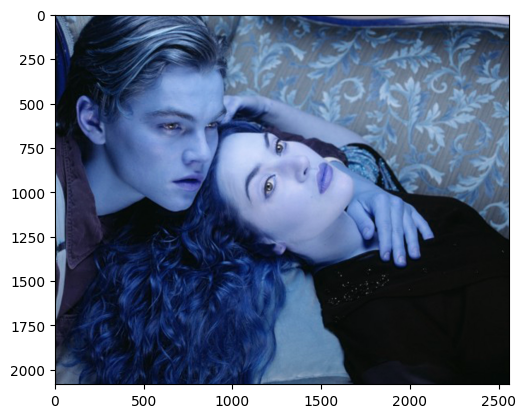

In [2]:
img = cv2.imread('titanic.jpg')
plt.imshow(img)
plt.show()

In [3]:
# Making a gray image.
gray = cv2.imread('titanic.jpg', 0)

In [4]:
# Making a numpy array.
im = np.float32(gray) / 255.0
g_X = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
g_y = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)

mag, angle = cv2.cartToPolar(g_X, g_y, angleInDegrees=True)

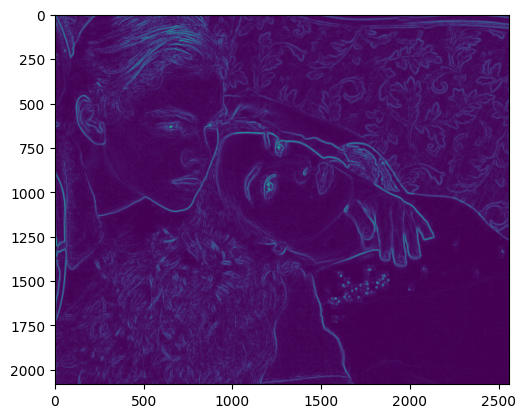

In [5]:
plt.imshow(mag)
plt.show()

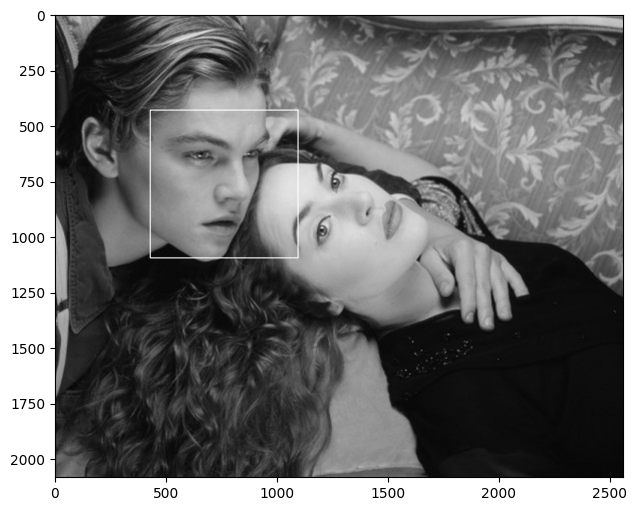

In [7]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 160, 122), 3)

plt.figure(figsize=(10, 6))
plt.imshow(gray, cmap='gray')
plt.show()


# Violi-Jons

In [ ]:
img = cv2.imread('chess_1.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontal_default.xml')

In [ ]:
face = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

In [ ]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 4)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(img_rgb)
plt.show()